<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/SVM_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [6]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [10]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [14]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [20]:
print("\nClass distribution:\n", y.value_counts())


Class distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [53]:
# corr with y
corr = X.corrwith(y)
print(corr.sort_values(ascending=False))

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0.776454
mean concave points       -0

<Figure size 1200x800 with 0 Axes>

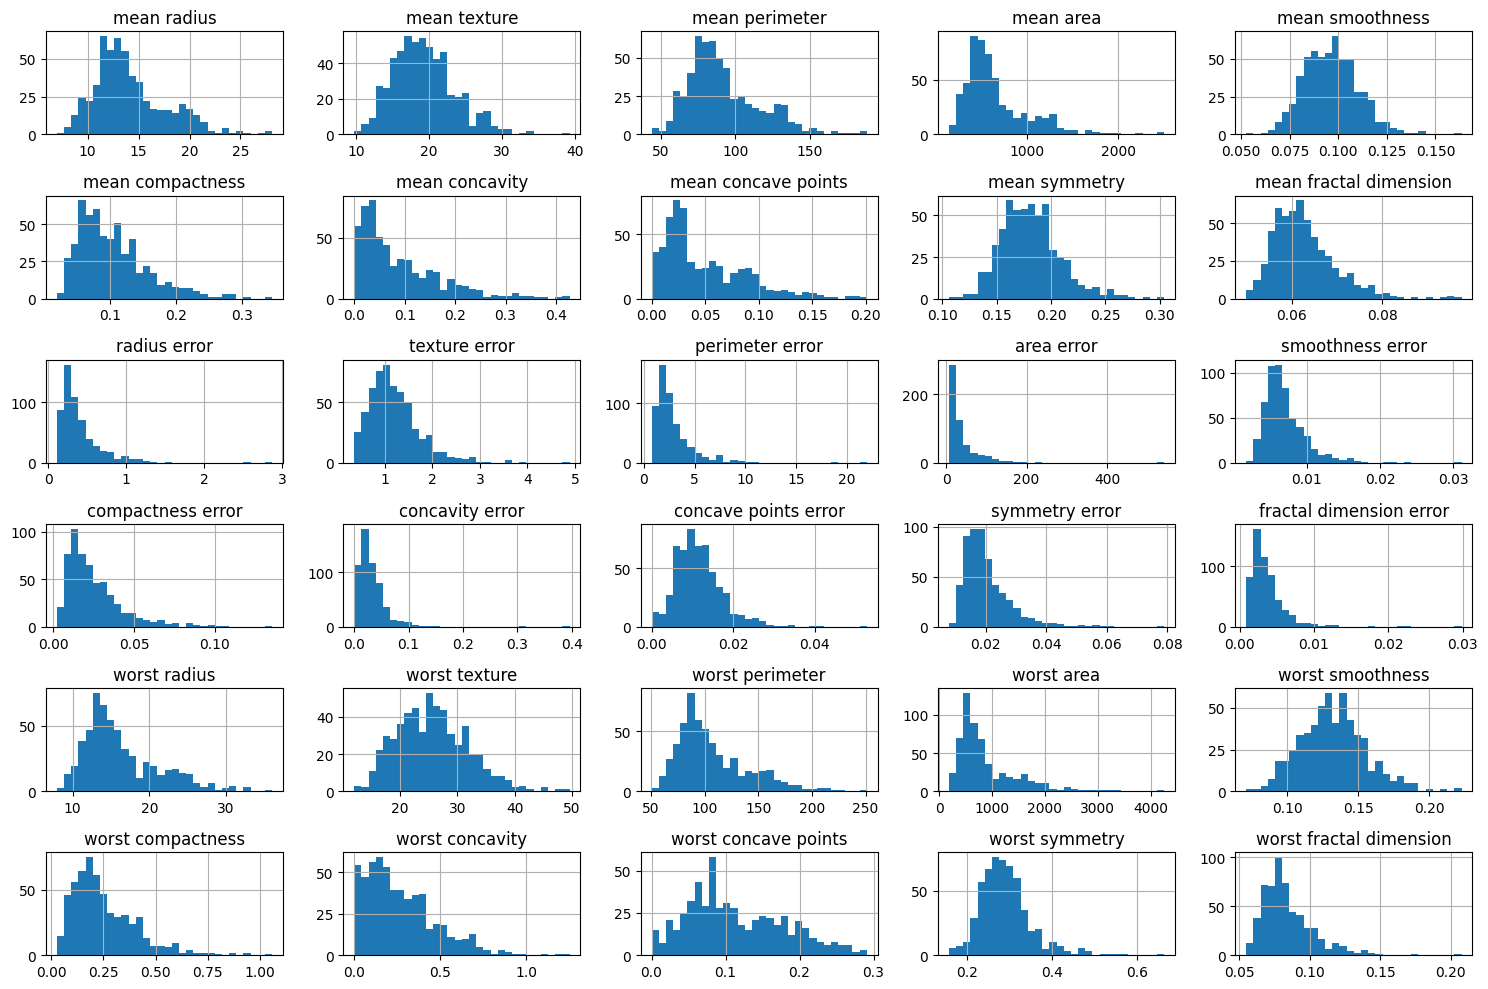

In [21]:
plt.figure(figsize=(12, 8))
X.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

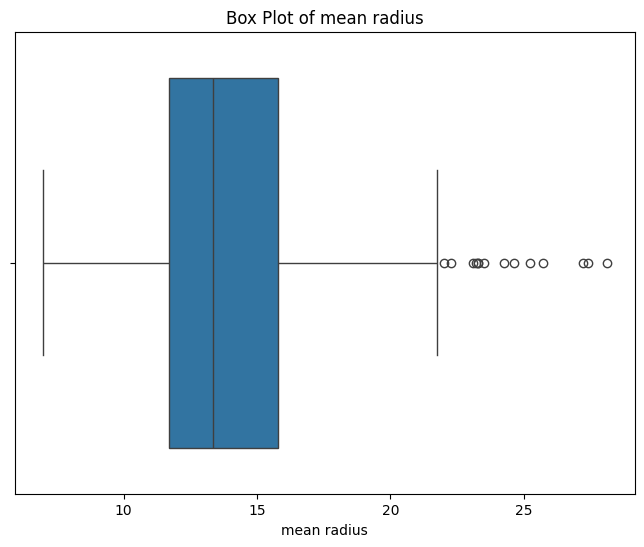

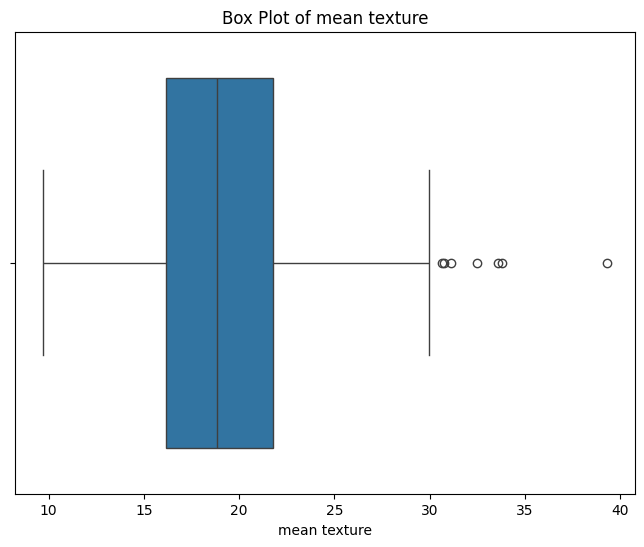

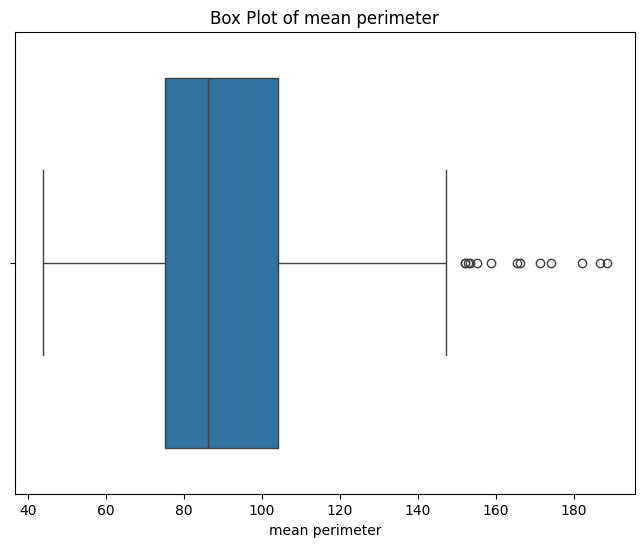

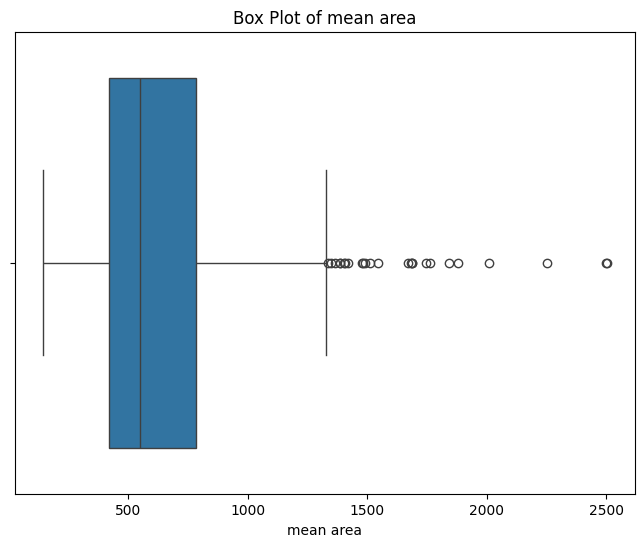

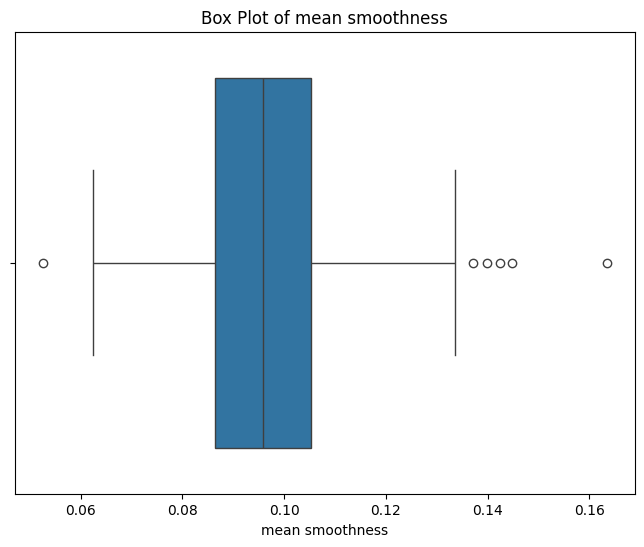

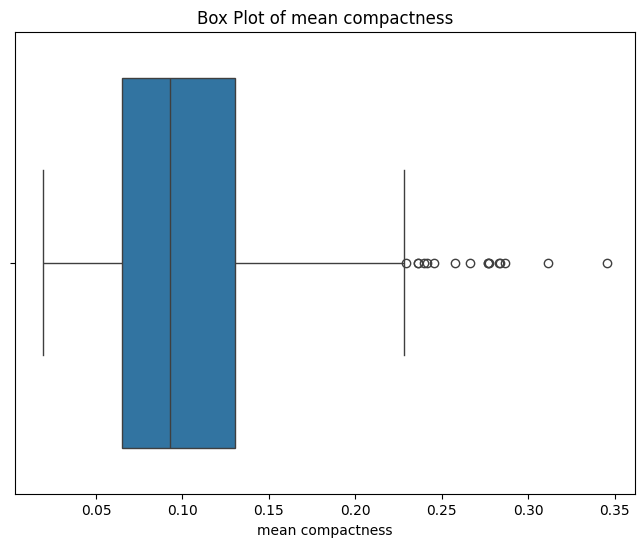

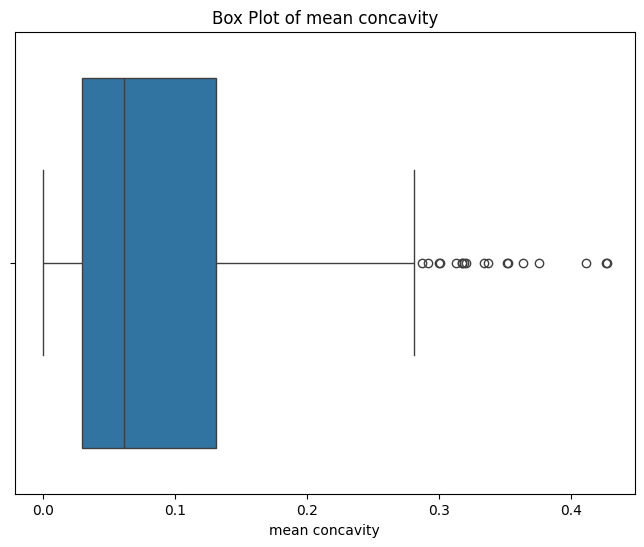

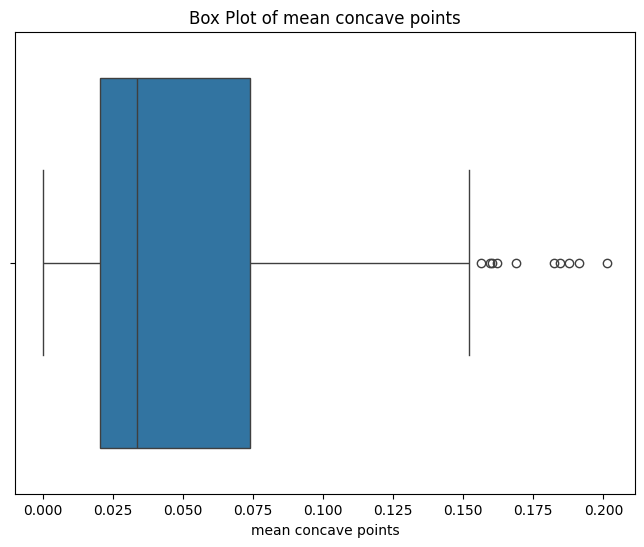

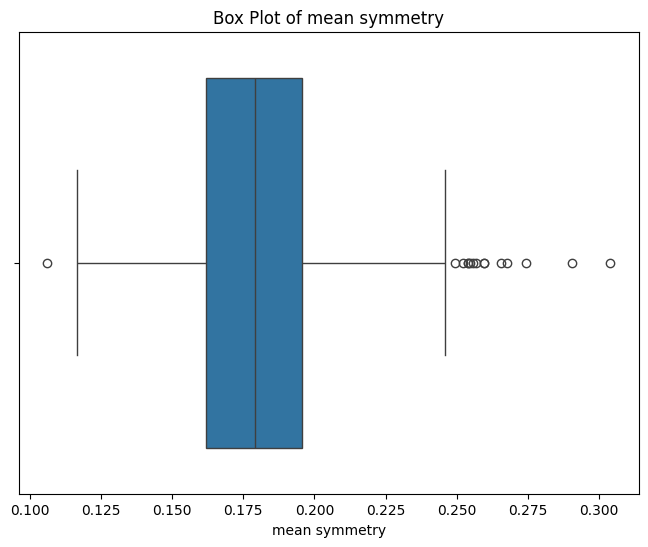

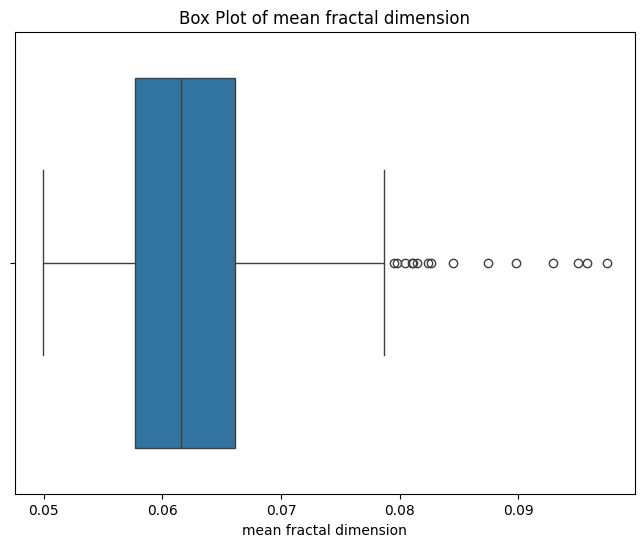

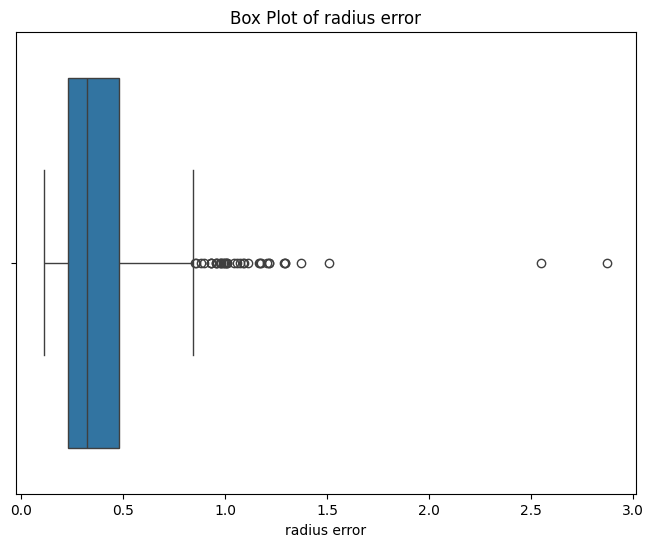

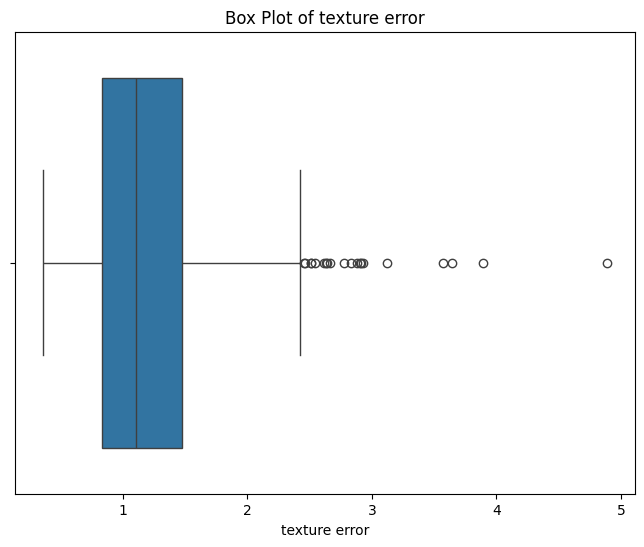

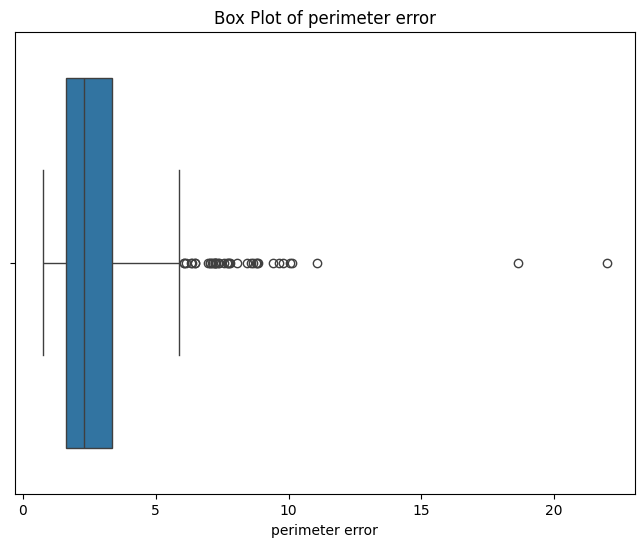

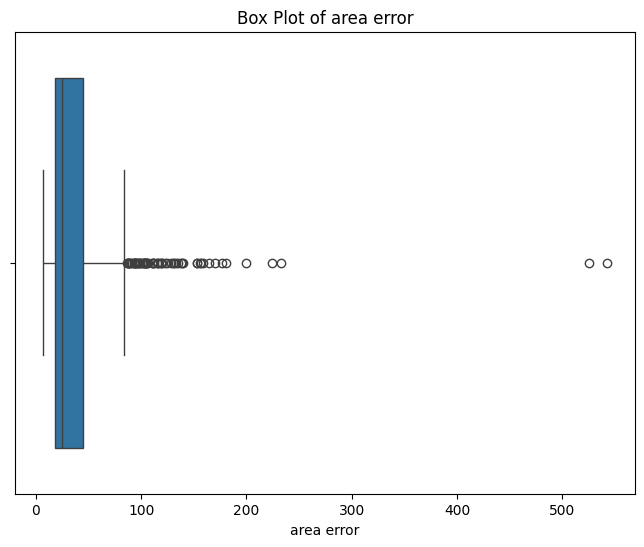

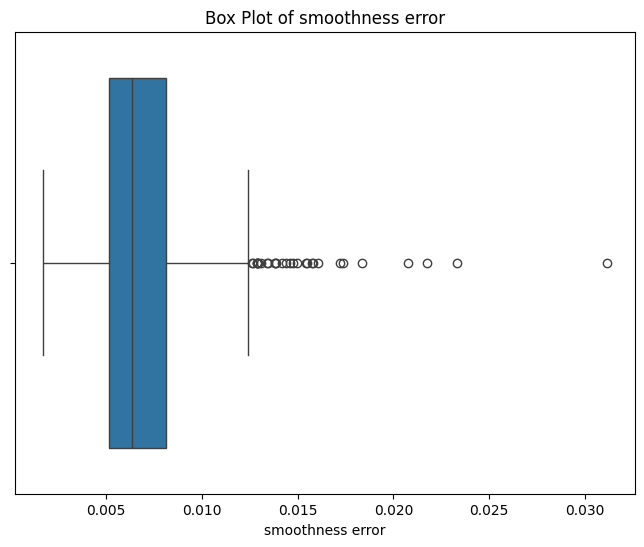

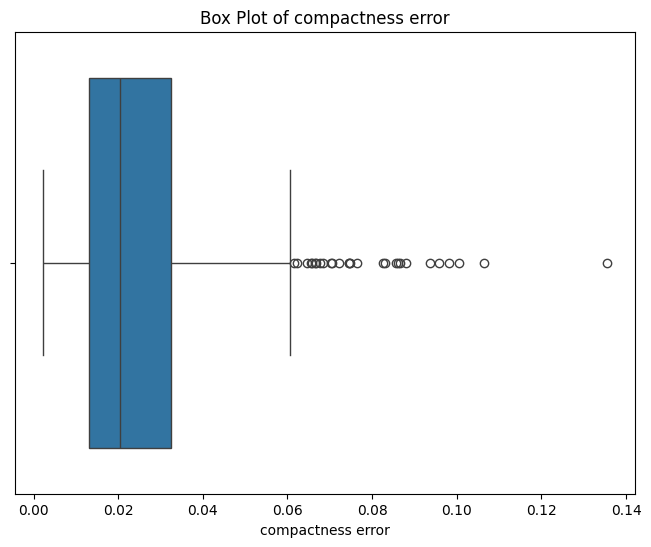

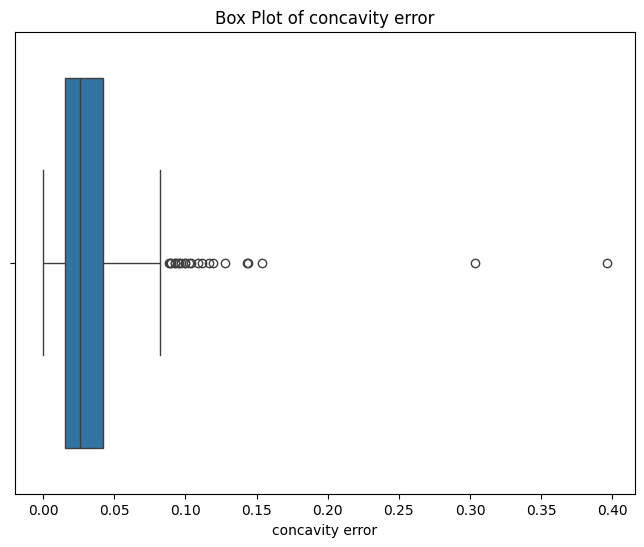

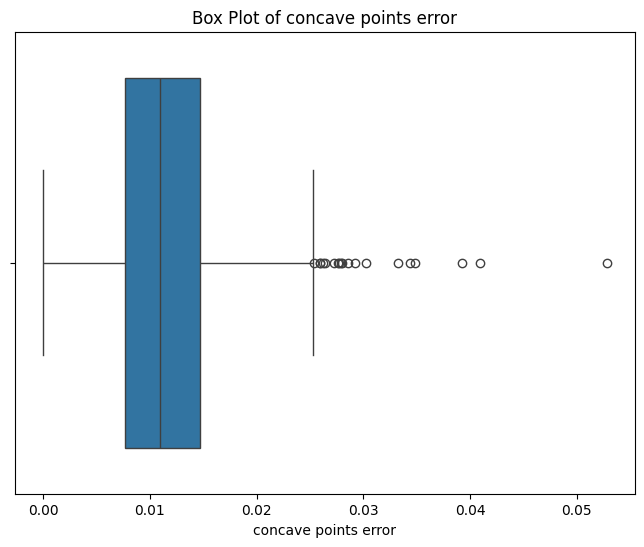

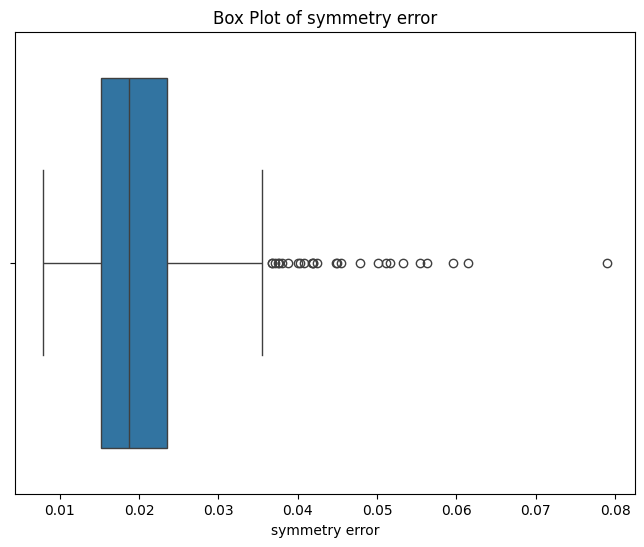

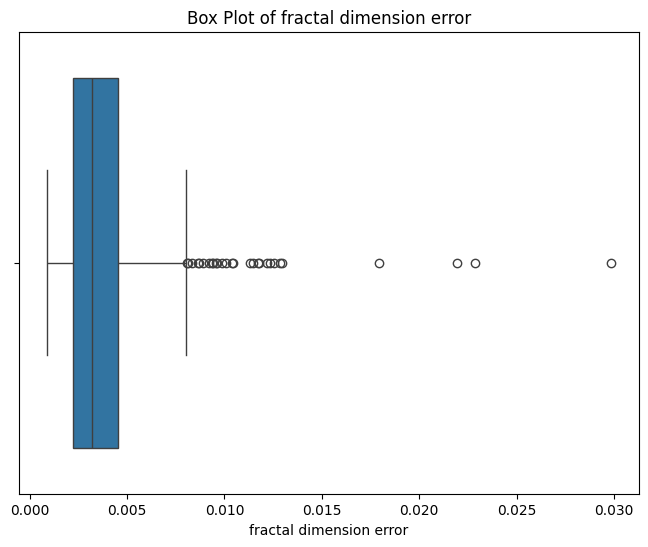

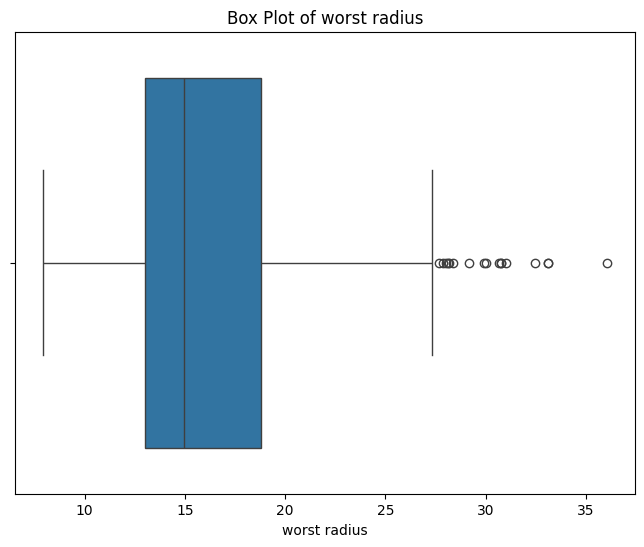

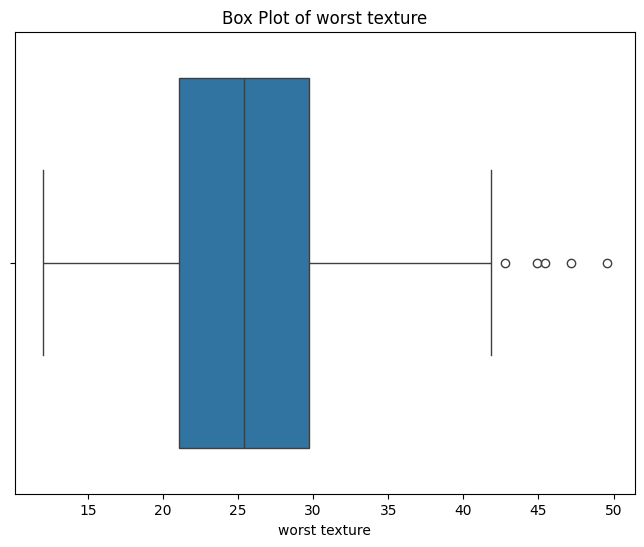

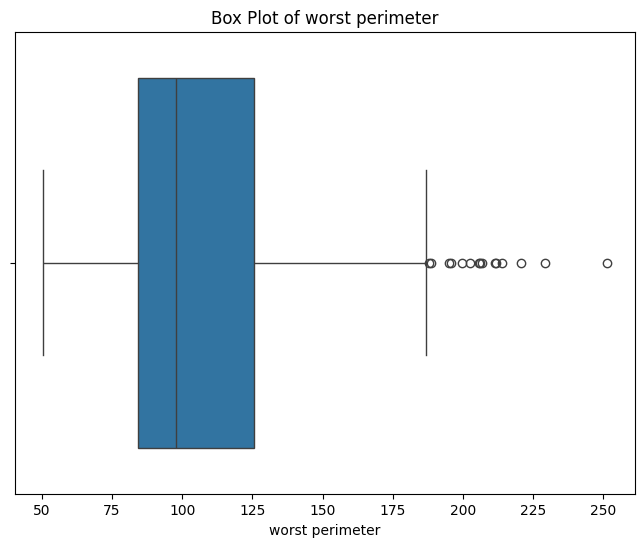

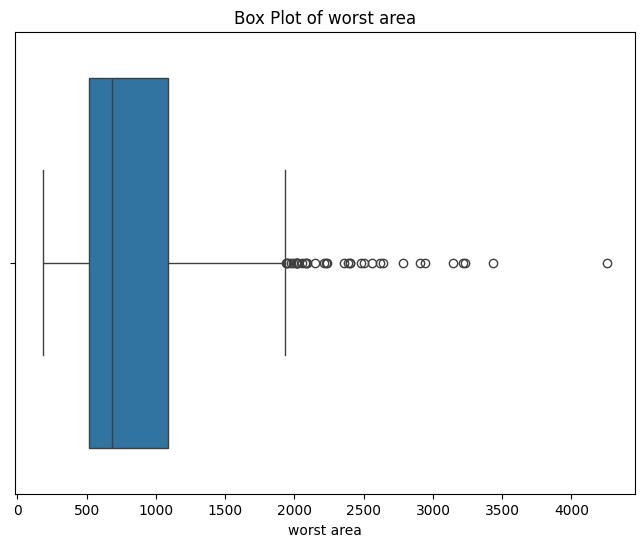

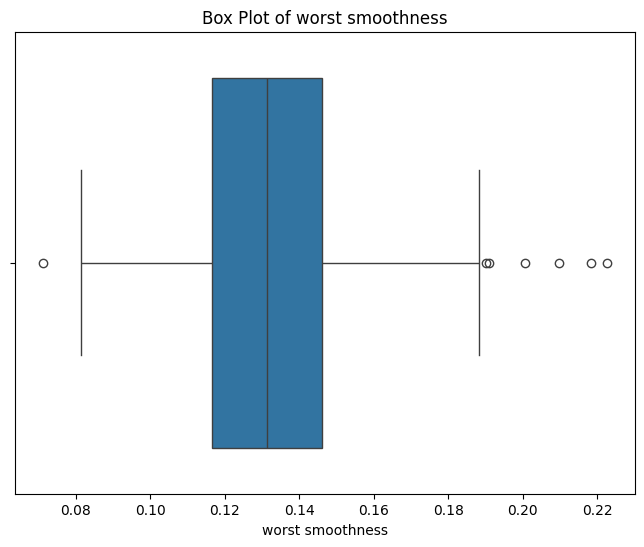

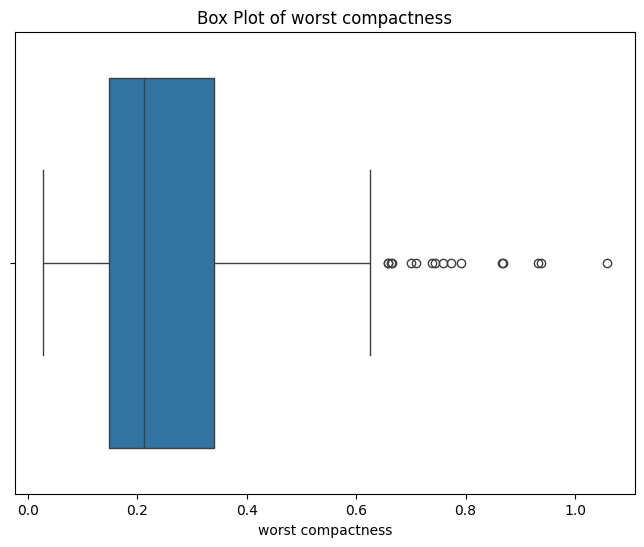

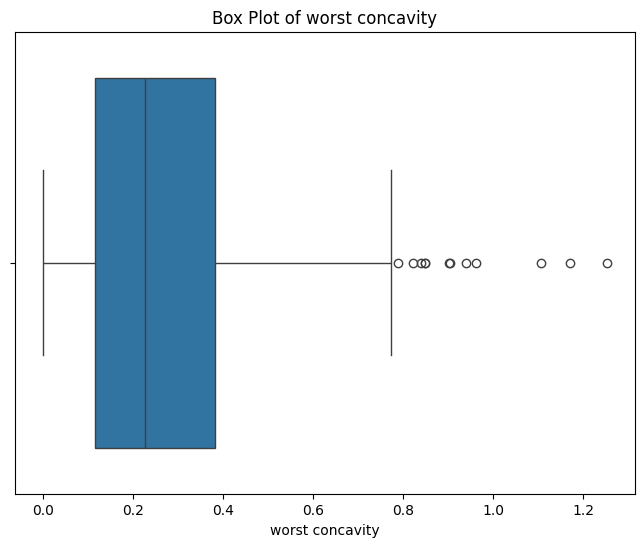

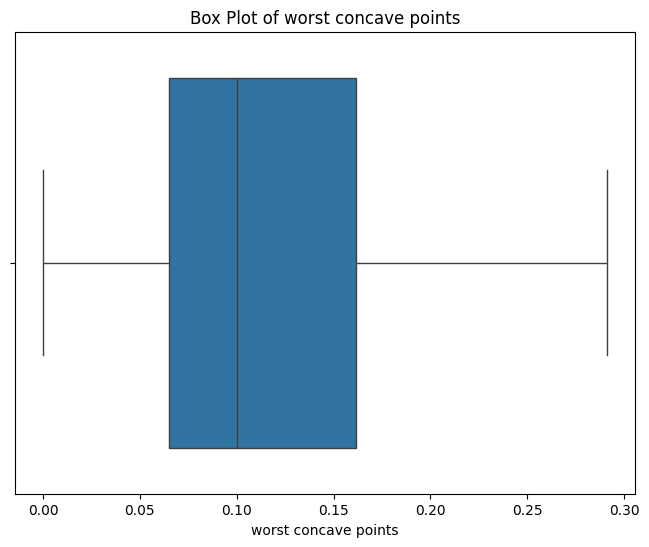

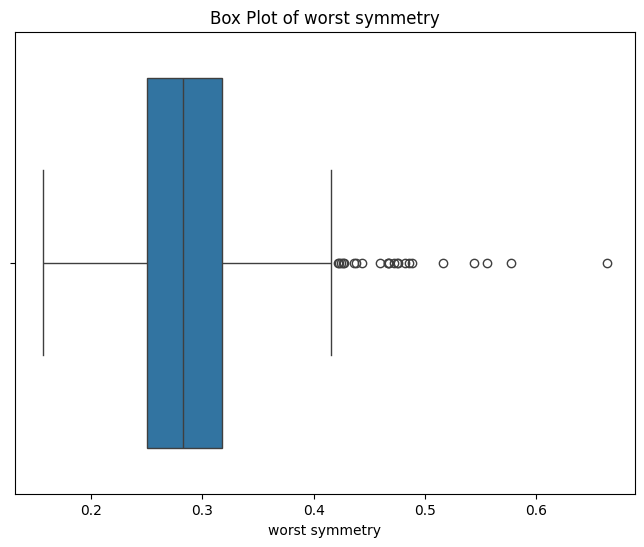

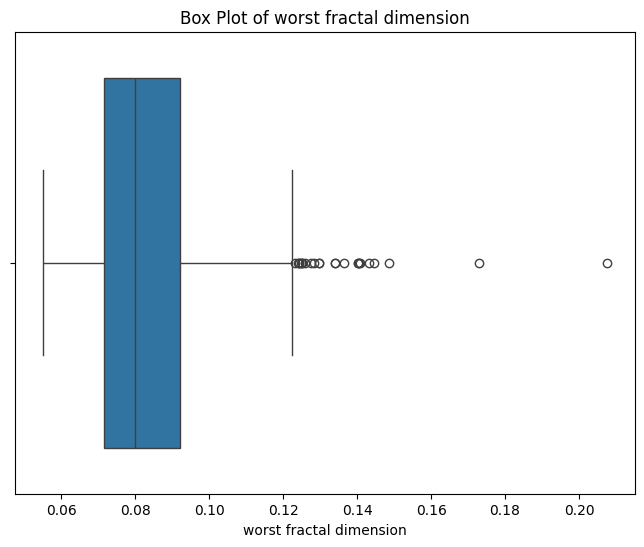

In [57]:
# box plots for each feature
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [26]:
# normal SVM
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [28]:
# Test different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

In [29]:
results_df = pd.DataFrame(results).T
print(results_df)

         Accuracy  Precision    Recall        F1       AUC
linear   0.956140   0.971429  0.957746  0.964539  0.996397
rbf      0.973684   0.972222  0.985915  0.979021  0.997380
poly     0.868421   0.825581  1.000000  0.904459  0.996397
sigmoid  0.947368   0.957746  0.957746  0.957746  0.990829


In [33]:
# diffrent C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
results = {}

for C in C_values:
    model = SVC( C=C, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[C] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

results_df = pd.DataFrame(results).T
print(results_df)

         Accuracy  Precision    Recall        F1       AUC
0.001    0.622807   0.622807  1.000000  0.767568  0.994759
0.010    0.622807   0.622807  1.000000  0.767568  0.995087
0.100    0.947368   0.945205  0.971831  0.958333  0.995742
1.000    0.973684   0.972222  0.985915  0.979021  0.997380
10.000   0.973684   0.972222  0.985915  0.979021  0.994759
100.000  0.938596   0.970588  0.929577  0.949640  0.989519


In [34]:
# diffrent gamma
gamma_values = [0.001, 0.01, 0.1, 1, 10]
results = {}

for gamma in gamma_values:
    model = SVC(kernel='rbf', gamma=gamma, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[gamma] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

results_df = pd.DataFrame(results).T
print(results_df)

        Accuracy  Precision    Recall        F1       AUC
0.001   0.964912   0.946667  1.000000  0.972603  0.998035
0.010   0.964912   0.958904  0.985915  0.972222  0.997380
0.100   0.964912   0.971831  0.971831  0.971831  0.988863
1.000   0.631579   0.628319  1.000000  0.771739  0.943007
10.000  0.622807   0.622807  1.000000  0.767568  0.205536


In [38]:
# grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10,],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.934 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.967 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.934 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=0.901 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.001, kernel=poly;, score=0.637 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.001, kerne

In [40]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

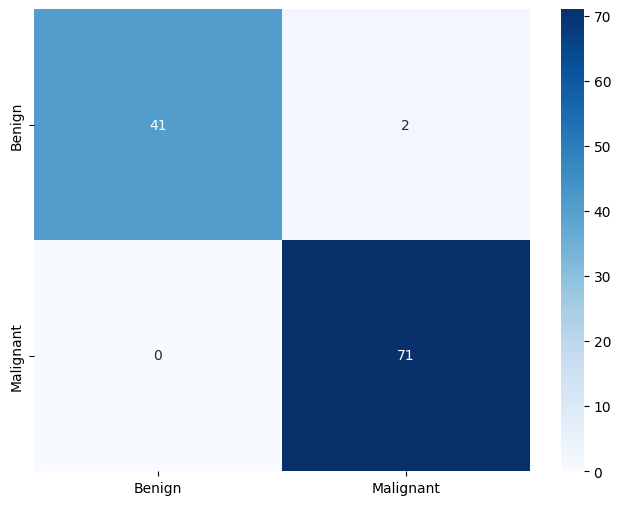

In [41]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

In [43]:
print(roc_auc_score(y_test, y_pred))

0.9767441860465117


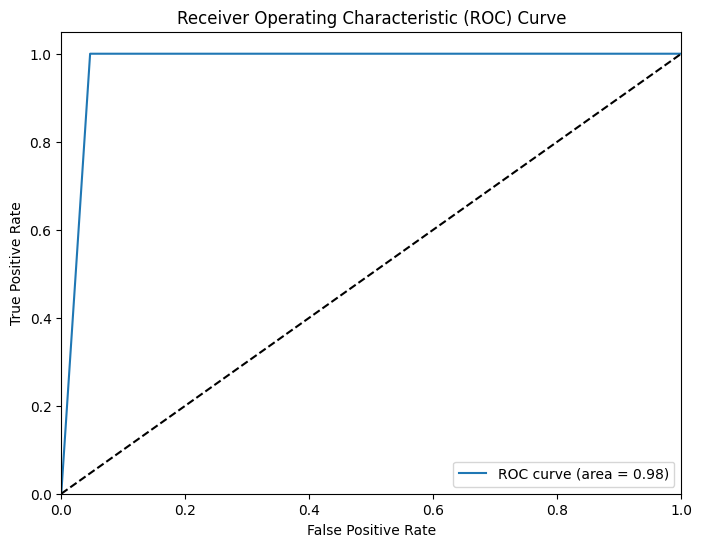

In [46]:
# draw auc curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
# cross validation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.96491228 0.98230088]
Mean accuracy: 0.9754075454122031
